In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


In [2]:
df_muts  = pd.read_csv("../sandbox/BVAS_Ranked_Mutations.tsv", sep="\t")
df_muts.rename(columns={"Unnamed: 0": "mutation",
                            "Run date": "RunDate"},
                inplace=True)
df_muts["Category"] = df_muts["mutation"].apply(lambda z: z.split(':')[0])
df_muts["Mutation"] = df_muts["mutation"].apply(lambda z: z.split(':')[1])

df_muts['RunDate'] = pd.to_datetime(df_muts['RunDate'])

df_muts["AvgRank"] = df_muts.groupby(["Category", "RunDate"])["Rank"].transform("mean")
df_muts["MaxRank"] = df_muts.groupby(["Category", "RunDate"])["Rank"].transform("min")

In [3]:
df_muts

,mutation,PIP,Beta,BetaStd,ConditionalBeta,ConditionalBetaStd,Rank,RunDate,Category,Mutation,AvgRank,MaxRank
0,S:L452R,1.000000,0.391635,0.055664,0.391635,0.055664,1,2021-03-12,S,L452R,1325.596234,1
1,S:R346T,1.000000,0.595724,0.039951,0.595724,0.039951,2,2021-03-12,S,R346T,1325.596234,1
2,S:R346K,1.000000,0.351070,0.023070,0.351070,0.023070,3,2021-03-12,S,R346K,1325.596234,1
3,S:L452Q,1.000000,0.483694,0.053569,0.483694,0.053569,4,2021-03-12,S,L452Q,1325.596234,1
4,S:L452M,1.000000,0.462981,0.049651,0.462981,0.049651,5,2021-03-12,S,L452M,1325.596234,1
...,...,...,...,...,...,...,...,...,...,...,...,...
143183,ORF10:L37F,0.003658,0.000000,0.000000,0.000000,0.000000,3788,2024-01-04,ORF10,L37F,2402.900000,843
143184,ORF8:S24L,0.003557,0.000000,0.000000,0.000000,0.000000,3789,2024-01-04,ORF8,S24L,1896.798165,15
143185,ORF1a:L3829F,0.002865,-0.000081,0.001516,-0.023412,0.010802,3790,2024-01-04,ORF1a,L3829F,1994.902001,21
143186,ORF1a:T265I,0.002416,-0.000020,0.001291,-0.003845,0.017557,3791,2024-01-04,ORF1a,T265I,1994.902001,21


In [4]:
df_muts["Category"].unique()

array(['S', 'ORF1a', 'ORF9b', 'ORF1b', 'N', 'E', 'ORF14', 'ORF6', 'ORF3a',
       'M', 'ORF8', 'ORF7b', 'ORF7a', 'ORF10'], dtype=object)

In [5]:
len(df_muts["Mutation"].unique())

4398

In [6]:
df_muts["RunDate"]

0        2021-03-12
1        2021-03-12
2        2021-03-12
3        2021-03-12
4        2021-03-12
            ...    
143183   2024-01-04
143184   2024-01-04
143185   2024-01-04
143186   2024-01-04
143187   2024-01-04
Name: RunDate, Length: 143188, dtype: datetime64[ns]

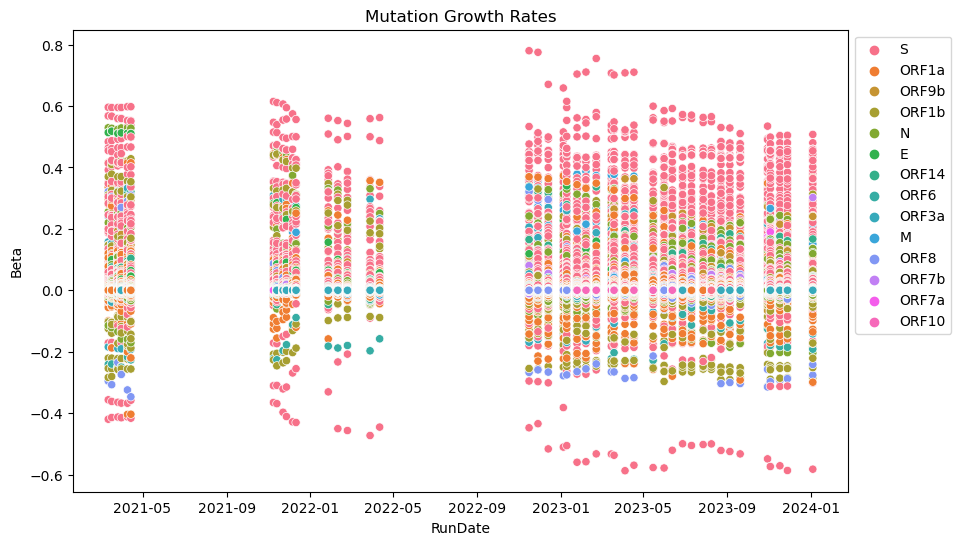

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data = df_muts,
                x = "RunDate",
                y = "Beta",
                hue = "Category")
ax.set_title("Mutation Growth Rates")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

Text(0.5, 1.0, 'Average Rank of COVID-19 Mutation Categories')

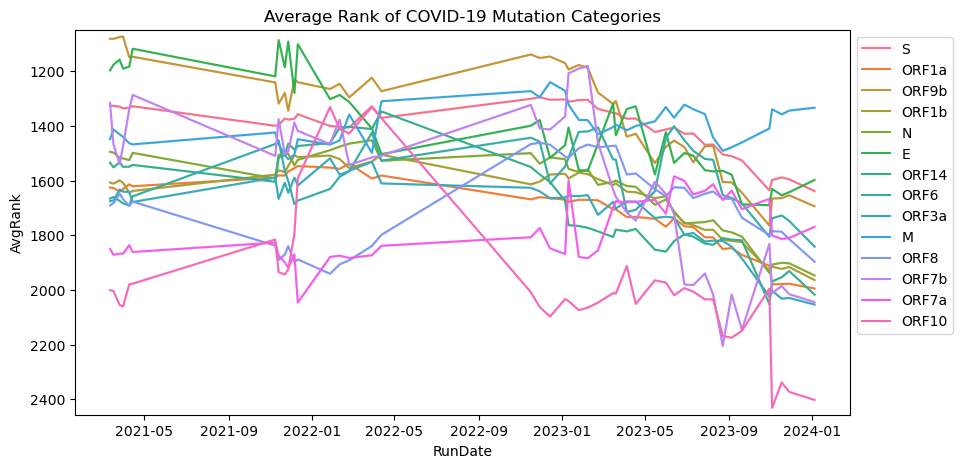

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = df_muts,
                x = "RunDate",
                y = "AvgRank",
                hue = "Category")
ax.set_ylim([max(df_muts["AvgRank"])+25, min(df_muts["AvgRank"])-25])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title("Average Rank of COVID-19 Mutation Categories")

Text(0.5, 1.0, 'Highest Rank of COVID-19 Mutation Categories')

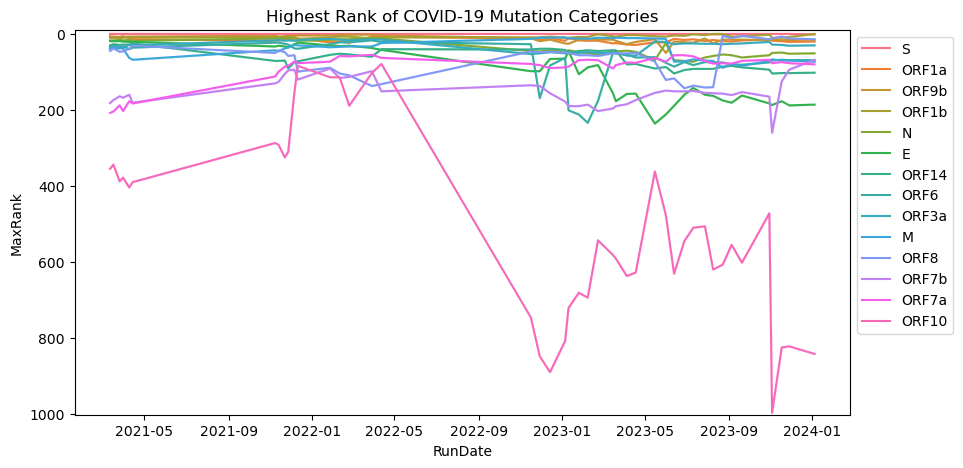

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = df_muts,
                x = "RunDate",
                y = "MaxRank",
                hue = "Category")
ax.set_ylim([max(df_muts["MaxRank"])+5, -10])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title("Highest Rank of COVID-19 Mutation Categories")

In [10]:
df_inf = pd.read_csv("../sandbox/infectivity_mutation_effects.csv")
df_inf.rename(columns={"Effect": "Infectivity",
                       "N": "N_inf"},
              inplace=True)
df_inf

,Mutation,Infectivity,N_inf
0,S704L,1.151122,48.0
1,E484V,0.966544,30.0
2,V83A,0.947953,72.0
3,N501Y,0.760468,360.0
4,K356T,0.682041,24.0
...,...,...,...
136,H655Y,-0.693031,354.0
137,S155R,-0.714798,55.0
138,A701V,-1.037817,6.0
139,R403T,-1.337216,12.0


In [11]:
df_neut = pd.read_csv("../sandbox/neutralization_mutation_effects_across_pools.csv")
df_neut.rename(columns={"Mean Effect": "Neutralization",
                        "N": "N_neut"},
              inplace=True)
df_neut

,Mutation,Neutralization,N_neut
0,K444T,-0.656364,61.0
1,F486S,-0.625525,367.0
2,L452R,-0.578281,620.0
3,K417N,-0.526447,1295.0
4,F486P,-0.471236,19.0
...,...,...,...
105,S704L,0.187463,313.0
106,T478K,0.192459,1447.0
107,K417V,0.227401,175.0
108,G339H,0.245320,451.0


In [12]:
df_temp = df_muts.merge(df_inf, on="Mutation", how="inner")
df = df_temp.merge(df_neut, on="Mutation", how="inner")
df = df.sort_values(by="RunDate")
df

,mutation,PIP,Beta,BetaStd,ConditionalBeta,ConditionalBetaStd,Rank,RunDate,Category,Mutation,AvgRank,MaxRank,Infectivity,N_inf,Neutralization,N_neut
0,S:L452R,1.000000,0.391635,0.055664,0.391635,0.055664,1,2021-03-12,S,L452R,1325.596234,1,0.309347,175.0,-0.578281,620.0
1452,S:K147E,0.235524,0.058810,0.112711,0.235928,0.095794,123,2021-03-12,S,K147E,1325.596234,1,-0.103853,66.0,-0.168674,267.0
1496,S:G339H,0.163467,0.035674,0.089047,0.216273,0.094941,142,2021-03-12,S,G339H,1325.596234,1,-0.212933,144.0,0.245320,451.0
1540,S:I210V,0.146572,0.035876,0.089424,0.214126,0.097774,155,2021-03-12,S,I210V,1325.596234,1,0.409222,87.0,-0.126627,395.0
1584,S:S477N,0.111697,0.014690,0.041566,0.094485,0.059775,181,2021-03-12,S,S477N,1325.596234,1,-0.098192,351.0,-0.067538,1401.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,S:L452R,1.000000,0.433811,0.046324,0.433811,0.046324,10,2024-01-04,S,L452R,1638.355350,2,0.309347,175.0,-0.578281,620.0
439,S:N501Y,1.000000,0.402113,0.071872,0.402113,0.071872,23,2024-01-04,S,N501Y,1638.355350,2,0.760468,360.0,-0.176968,1470.0
1099,S:D796Y,0.249706,0.042185,0.088799,0.212456,0.059475,157,2024-01-04,S,D796Y,1638.355350,2,-0.104458,351.0,-0.057698,1401.0
1275,S:S373P,0.999038,0.459070,0.101432,0.459390,0.100740,43,2024-01-04,S,S373P,1638.355350,2,-0.114867,348.0,-0.059546,1401.0


In [13]:
df["Infectivity"].corr(df["Neutralization"])

-0.04242282169642582

Text(0.5, 1.0, 'Neutralization vs Infectivity')

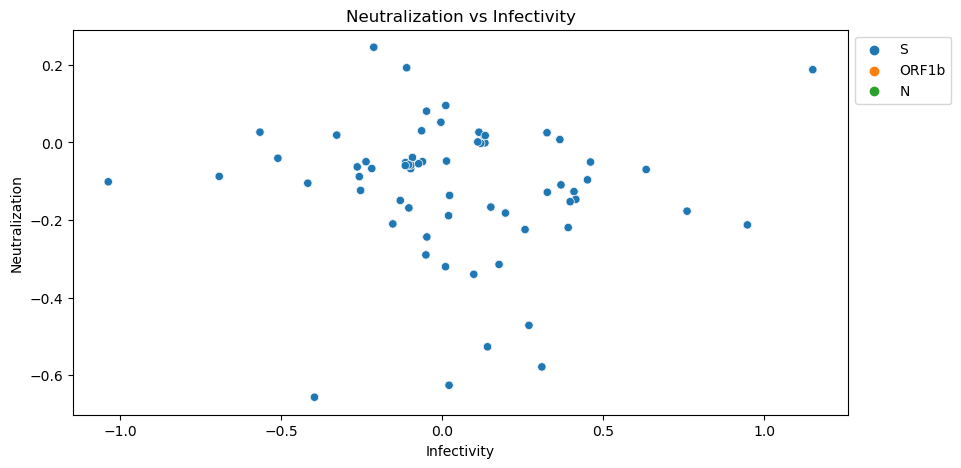

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = df,
                x = "Infectivity",
                y = "Neutralization",
                hue = "Category")

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title("Neutralization vs Infectivity")

In [15]:
ind = "Beta"

In [16]:
date = []
intercept = []
inf = []
neut = []
r2 = []

for d in df["RunDate"].unique():
    subset = df[df["RunDate"]==d]
    X = subset[["Infectivity", "Neutralization"]]
    y = subset[f"{ind}"]
    model = LinearRegression()
    model.fit(X,y)
    r_squared = model.score(X, y)
    date.append(d)
    intercept.append(model.intercept_)
    inf.append(model.coef_[0])
    neut.append(model.coef_[1])
    r2.append(r_squared)
    
results_linreg = pd.DataFrame({"Date": date,
                               "Intercept": intercept,
                               "Infectivity": inf,
                               "Neutralization": neut,
                               "R2": r2})

results_linreg = pd.melt(results_linreg, id_vars= ["Date"], var_name = "Metric", value_name = "Value")
results_linreg


,Date,Metric,Value
0,2021-03-12,Intercept,0.113254
1,2021-03-17,Intercept,0.114749
2,2021-03-26,Intercept,0.115040
3,2021-03-31,Intercept,0.115505
4,2021-04-09,Intercept,0.114936
...,...,...,...
171,2023-10-30,R2,0.005978
172,2023-11-03,R2,0.000535
173,2023-11-17,R2,0.001516
174,2023-11-28,R2,0.001565


In [17]:
metric_palette = {"Intercept": "RoyalBlue",
                  "Infectivity": "DarkOrange",
                  "Neutralization": "ForestGreen"}

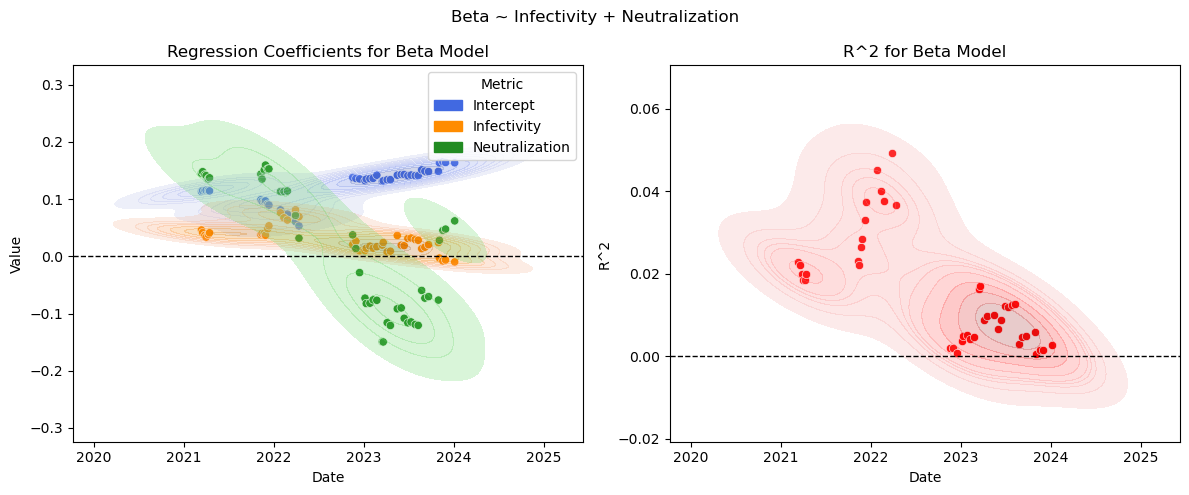

In [18]:
coefs_linreg = results_linreg[(results_linreg["Metric"]=="Intercept")|(results_linreg["Metric"]=="Infectivity")|(results_linreg["Metric"]=="Neutralization")]

fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.scatterplot(data = coefs_linreg,
                x = "Date",
                y = "Value",
                hue = "Metric",
                palette = metric_palette,
                ax=ax[0])

sns.kdeplot(data=coefs_linreg, x="Date", y="Value", hue="Metric", palette=metric_palette, fill=True, alpha=0.25, ax=ax[0])

ax[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
ax[0].set_title("Regression Coefficients for Beta Model")

sns.scatterplot(data = results_linreg[results_linreg["Metric"]=="R2"],
                x = "Date",
                y = "Value",
                color = "Red",
                ax=ax[1])

sns.kdeplot(data=results_linreg[results_linreg["Metric"]=="R2"], x="Date", y="Value", color="Red", fill=True, alpha=0.25, ax=ax[1])

ax[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
ax[1].set_ylabel("R^2")
ax[1].set_title("R^2 for Beta Model")

plt.suptitle(f"{ind} ~ Infectivity + Neutralization")
plt.tight_layout()


# Single Models

In [19]:
def run_linreg(df, expl):
    date = []
    intercept = []
    x = []
    r2 = []

    for d in df["RunDate"].unique():
        subset = df[df["RunDate"]==d]
        X = subset[[f"{expl}"]]
        y = subset[f"{ind}"]
        model = LinearRegression()
        model.fit(X,y)
        r_squared = model.score(X, y)
        date.append(d)
        intercept.append(model.intercept_)
        x.append(model.coef_[0])
        r2.append(r_squared)
        
    results_linreg = pd.DataFrame({"Date": date,
                                "Intercept": intercept,
                                f"{expl}": x,
                                "R2": r2})

    results_linreg = pd.melt(results_linreg, id_vars= ["Date"], var_name = "Metric", value_name = "Value")
    return results_linreg


def plot_scatter(results_linreg, expl):
    coefs_linreg = results_linreg[(results_linreg["Metric"]=="Intercept")|(results_linreg["Metric"]==f"{expl}")]

    fig, ax = plt.subplots(ncols=2,
                        figsize=(12,5))

    sns.scatterplot(data=coefs_linreg,
                    x="Date",
                    y="Value",
                    hue="Metric",
                    palette=metric_palette,
                    ax=ax[0])
    sns.kdeplot(data=coefs_linreg,
                x="Date",
                y="Value",
                hue="Metric",
                palette=metric_palette,
                fill=True,
                alpha=0.25,
                ax=ax[0])
    ax[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax[0].set_title(f"Regression Coefficients for {ind} vs {expl}")


    sns.scatterplot(data=results_linreg[results_linreg["Metric"]=="R2"],
                    x="Date",
                    y="Value",
                    color="Red",
                    ax=ax[1])
    sns.kdeplot(data=results_linreg[results_linreg["Metric"]=="R2"],
                x="Date",
                y="Value",
                color="Red",
                fill=True,
                alpha=0.25,
                ax=ax[1])
    ax[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
    #ax[1].set_ylim([-1, 1])
    ax[1].set_ylabel("R^2")
    ax[1].set_title(f"R^2 for {ind} vs {expl}")

    plt.suptitle(f"{ind} ~ {expl}")
    plt.tight_layout()

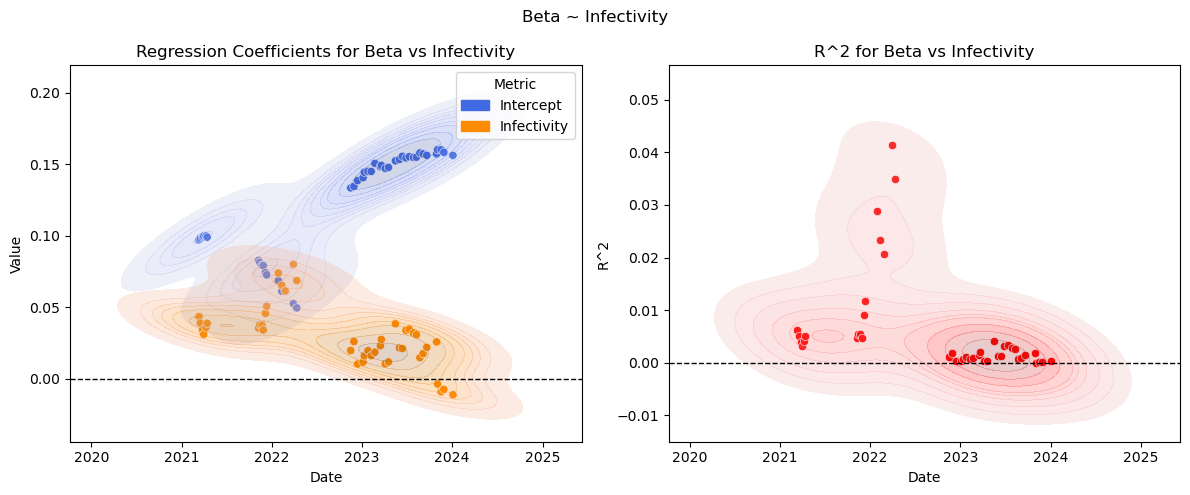

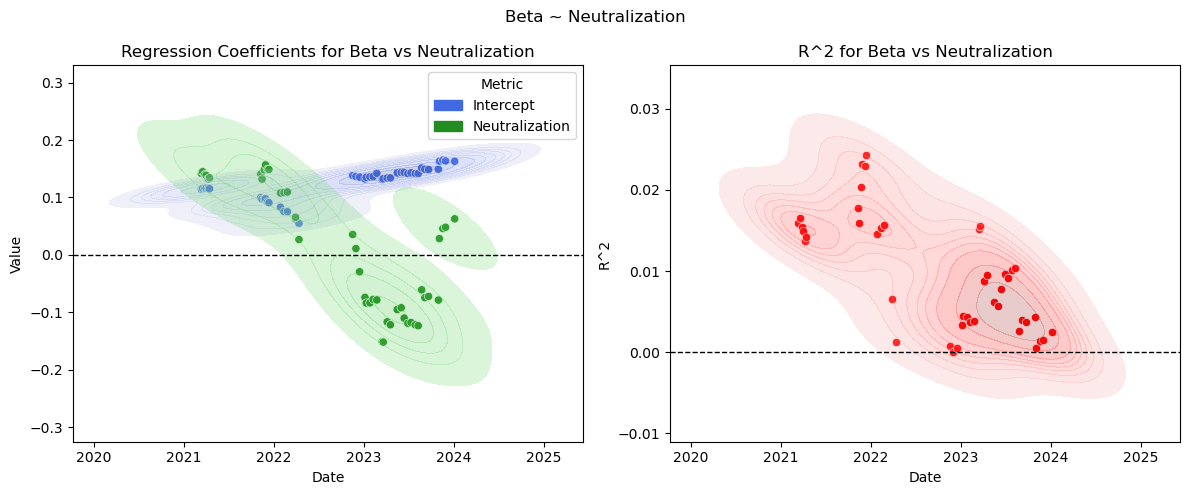

In [20]:
for e in ["Infectivity", "Neutralization"]:
    r = run_linreg(df, e)
    plot_scatter(r, e)